In [4]:
import nltk
import numpy as np
import warnings

warnings.filterwarnings("ignore")

In [5]:
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Plamen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Plamen\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Plamen\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Plamen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Plamen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Plamen\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_p

True

# Positive review

In [6]:
text = "I enjoyed 'Minority Report'. Tom Cruise didn't disappoint, and Steven Spielberg is at the top of his game. The movie was long but it wasn't boring. GREAT MOVIE!"
print(text)

I enjoyed 'Minority Report'. Tom Cruise didn't disappoint, and Steven Spielberg is at the top of his game. The movie was long but it wasn't boring. GREAT MOVIE!


## sentence tokenize

In [7]:
sentences = nltk.sent_tokenize(text)

print(len(sentences))
for sentence in sentences:
    print(sentence)

4
I enjoyed 'Minority Report'.
Tom Cruise didn't disappoint, and Steven Spielberg is at the top of his game.
The movie was long but it wasn't boring.
GREAT MOVIE!


## word tokenize

In [8]:
words = nltk.word_tokenize(text)
print(len(words))
print(words[:10])
print(words[10:20])
print(words[20:32])
print(words[32:])

36
['I', 'enjoyed', "'Minority", 'Report', "'", '.', 'Tom', 'Cruise', 'did', "n't"]
['disappoint', ',', 'and', 'Steven', 'Spielberg', 'is', 'at', 'the', 'top', 'of']
['his', 'game', '.', 'The', 'movie', 'was', 'long', 'but', 'it', 'was', "n't", 'boring']
['.', 'GREAT', 'MOVIE', '!']


# Parts of speech

In [9]:
nltk.download('tagsets')
nltk.help.upenn_tagset('PRP$')

PRP$: pronoun, possessive
    her his mine my our ours their thy your


[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\Plamen\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [10]:
nltk.help.upenn_tagset('PRP$')

PRP$: pronoun, possessive
    her his mine my our ours their thy your


In [11]:
nltk.pos_tag(nltk.word_tokenize('The movie was long but it was not boring'))

[('The', 'DT'),
 ('movie', 'NN'),
 ('was', 'VBD'),
 ('long', 'RB'),
 ('but', 'CC'),
 ('it', 'PRP'),
 ('was', 'VBD'),
 ('not', 'RB'),
 ('boring', 'JJ')]

In [12]:
words_pos = nltk.pos_tag(words)
words_pos

[('I', 'PRP'),
 ('enjoyed', 'VBP'),
 ("'Minority", 'JJ'),
 ('Report', 'NNP'),
 ("'", 'POS'),
 ('.', '.'),
 ('Tom', 'NNP'),
 ('Cruise', 'NNP'),
 ('did', 'VBD'),
 ("n't", 'RB'),
 ('disappoint', 'VB'),
 (',', ','),
 ('and', 'CC'),
 ('Steven', 'NNP'),
 ('Spielberg', 'NNP'),
 ('is', 'VBZ'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('top', 'NN'),
 ('of', 'IN'),
 ('his', 'PRP$'),
 ('game', 'NN'),
 ('.', '.'),
 ('The', 'DT'),
 ('movie', 'NN'),
 ('was', 'VBD'),
 ('long', 'RB'),
 ('but', 'CC'),
 ('it', 'PRP'),
 ('was', 'VBD'),
 ("n't", 'RB'),
 ('boring', 'JJ'),
 ('.', '.'),
 ('GREAT', 'JJ'),
 ('MOVIE', 'NN'),
 ('!', '.')]

# Named entity recognition

In [13]:
named_entities = []
for t in nltk.ne_chunk(words_pos):
    if hasattr(t,'label'):
        e_name = ' '.join(c[0] for c in t.leaves());
        e_type = t.label()
        named_entities.append((e_name, e_type))
        
print(named_entities)

[('Report', 'ORGANIZATION'), ('Tom Cruise', 'PERSON'), ('Steven Spielberg', 'PERSON'), ('GREAT', 'ORGANIZATION'), ('MOVIE', 'ORGANIZATION')]


## Remove named entities and lower case


In [14]:
words_nonames = words.copy()
for ne in named_entities:
    if ne[1]=='PERSON':
        for name in nltk.word_tokenize(ne[0]):
            words_nonames.remove(name)

In [15]:
words_nonames_lower = [word.lower() for word in words_nonames]
' '.join(words_nonames_lower)

"i enjoyed 'minority report ' . did n't disappoint , and is at the top of his game . the movie was long but it was n't boring . great movie !"

## Remove stopwords

In [16]:
from nltk.corpus import stopwords
swords = stopwords.words('english') 

In [17]:
words_nonames_lower_nostop = [w for w in words_nonames_lower if not w in swords]
print(' '.join(words_nonames_lower_nostop))

enjoyed 'minority report ' . n't disappoint , top game . movie long n't boring . great movie !


In [18]:
print(len(words_nonames_lower_nostop))

19


## Stemming

In [19]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [20]:
A = ['joy','joyful','joyfully','joyous','geese']
[stemmer.stem(w) for w in A]

['joy', 'joy', 'joy', 'joyou', 'gees']

In [21]:
A = ['run','runner','running','ran']
[stemmer.stem(w) for w in A]

['run', 'runner', 'run', 'ran']

In [22]:
words_nonames_lower_nostop_stem = [stemmer.stem(w) for w in words_nonames_lower_nostop]
print(' '.join(words_nonames_lower_nostop_stem))

enjoy 'minor report ' . n't disappoint , top game . movi long n't bore . great movi !


## Lemmatization

In [23]:
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

In [24]:
A = ['joy','joyful','joyfully','joyous','geese', 'dogs']
[lemma.lemmatize(w) for w in A]

['joy', 'joyful', 'joyfully', 'joyous', 'goose', 'dog']

In [25]:
words_nonames_lower_nostop_lemma = [lemma.lemmatize(w) for w in words_nonames_lower_nostop]
print(' '.join(words_nonames_lower_nostop_lemma))

enjoyed 'minority report ' . n't disappoint , top game . movie long n't boring . great movie !


In [26]:
' '.join([stemmer.stem(w) for w in words_nonames_lower_nostop])

"enjoy 'minor report ' . n't disappoint , top game . movi long n't bore . great movi !"

In [27]:
' '.join([lemma.lemmatize(w) for w in words_nonames_lower_nostop])

"enjoyed 'minority report ' . n't disappoint , top game . movie long n't boring . great movie !"

# Bag of words

In [28]:
doc1 = [w for w in words_nonames_lower_nostop_stem if (w!="'") and (w!=".") and (w!=",") and (w!="!")]

In [29]:
doc1

['enjoy',
 "'minor",
 'report',
 "n't",
 'disappoint',
 'top',
 'game',
 'movi',
 'long',
 "n't",
 'bore',
 'great',
 'movi']

# idf

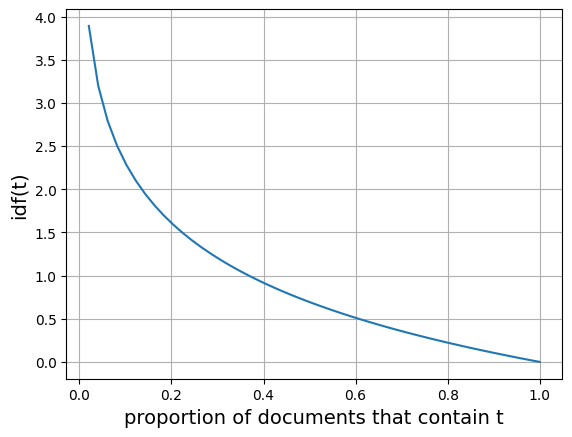

In [30]:
import matplotlib.pyplot as plt
x = np.linspace(0,1)
plt.plot(x,-np.log(x))
plt.ylabel('idf(t)',fontsize=14)
plt.xlabel('proportion of documents that contain t',fontsize=14)
plt.grid(':')

### Google's Word2vec

In [36]:
import gensim.downloader as api

In [37]:
path = api.load("word2vec-google-news-300", return_path=True)

In [38]:
print(path)

C:\Users\Plamen/gensim-data\word2vec-google-news-300\word2vec-google-news-300.gz


In [60]:
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api

In [61]:
corpus = api.load('text8')  # download the corpus and return it opened as an iterable
model = Word2Vec(corpus)  # train a model from the corpus
model.wv.most_similar('car')

[('driver', 0.796831488609314),
 ('taxi', 0.7318128943443298),
 ('cars', 0.7149017453193665),
 ('motorcycle', 0.6871437430381775),
 ('racing', 0.6631249189376831),
 ('vehicle', 0.6613308191299438),
 ('truck', 0.6558552980422974),
 ('glider', 0.6471863389015198),
 ('automobile', 0.627905011177063),
 ('passenger', 0.6185401082038879)]

In [53]:
from gensim.models import Word2Vec

In [54]:
model = Word2Vec(corpus)

In [58]:
model.wv.most_similar('car')

[('driver', 0.816473662853241),
 ('taxi', 0.7348203063011169),
 ('cars', 0.7211964726448059),
 ('glider', 0.6976900100708008),
 ('vehicle', 0.6942869424819946),
 ('motorcycle', 0.6924675107002258),
 ('truck', 0.6766753792762756),
 ('passenger', 0.6634942889213562),
 ('racing', 0.6607642769813538),
 ('audi', 0.6510863304138184)]